# Week Four - Fitting Data: Parameter Estimation Using iminuit

<hr style="border:2px solid gray">

# Outline <a id='outline'></a>
1. [Section One: Interpolation](#section-1)
    1. [Linear Interpolation](#li)
    1. [Cubic Spline](#cs)
1. [Section Two: iminuit](#section-2)
1. [Section Three: Using iminuit](#ui)
    1. [The Basics](#tb)
    1. [Gradient Descent](#gd)
    1. [The Minuit object](#tmo)
    1. [Parameter Uncertainties, Covariances, and Confidence Intervals](#pucaci)
    1. [Maximum-likelihood fits](#mlf)

In data science, you will often be required to fit a curve to a set of data, because you want to interpolate between the data points you have, parameterize it, or extract some physical value from the data you have taken with associated uncertainty. This notebook serves as an introduction to some of these methods.

<hr style="border:2px solid gray">
<a name="section-1"></a>

## Section One: Interpolation  <a id='i'></a>

A curve of best fit is a function which tries to minimise the distance between it and all od the data points. This is by minimising the error. A simple method to create one is using linear interpolation. Although you can write a linear interpolation algorithm, there is a built-in option is available in `scipy`. 

## Linear Interpolation <a id='li'></a>

Linear interpolation gives a **line of best fit**, which is a generalisation of a curve of best fit and is best used on linear data. 

Here is a simple example of using linear interpolation. After performing this, we visualise it and show a distribution of the errors: 

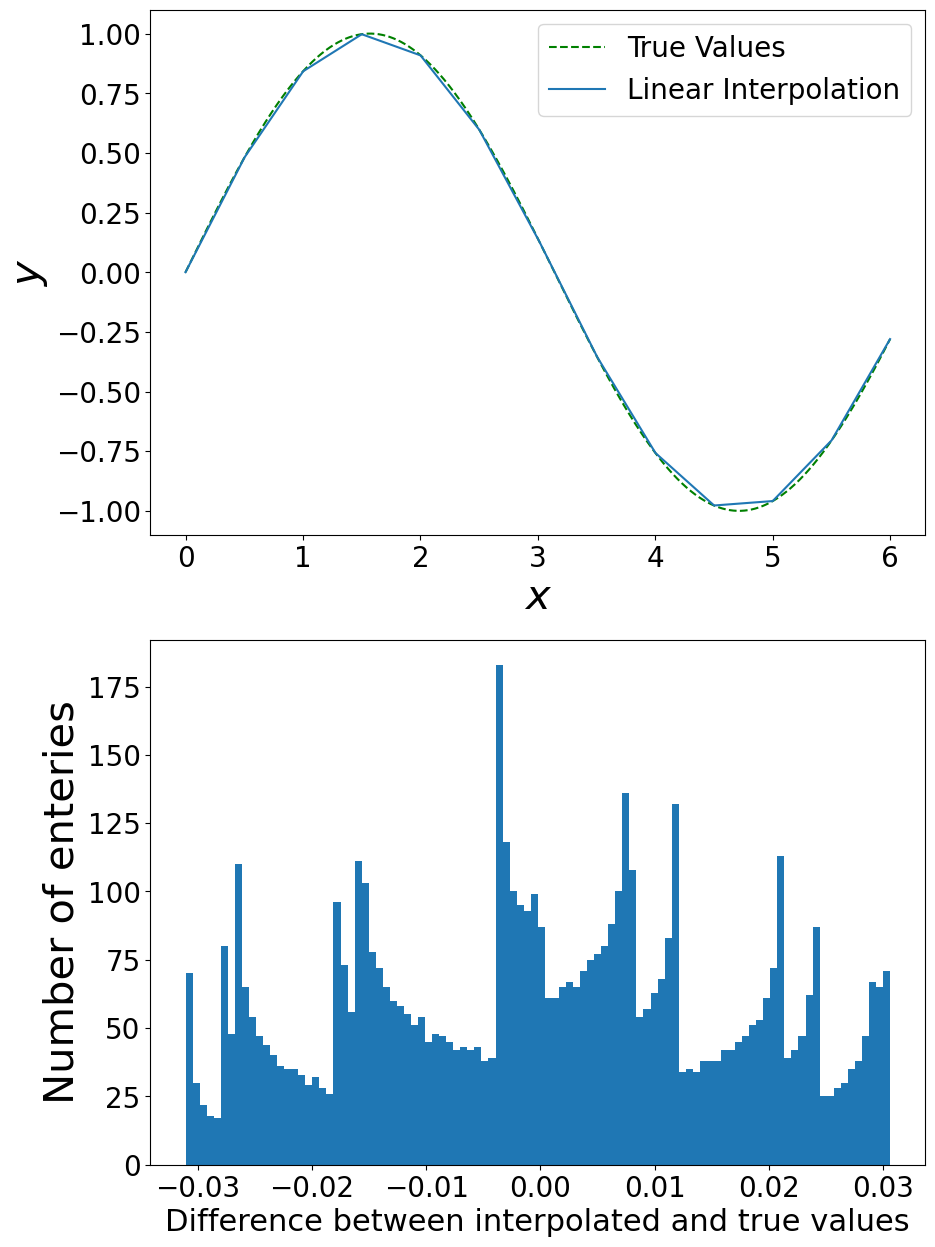

In [48]:
import numpy as np
import scipy as sp
import pylab as plt

x=np.arange(0, 6.5, 0.5) #We go to  6.5 to ensure that we get to 6
y=np.sin(x)

#Finer binned version for comparison
xf=np.arange(0, 6, 0.001) 
yf=np.sin(xf)


fig, axs= plt.subplots(2)
axs[0].plot(xf, yf, "g--",label="True Values")
axs[0].set_xlabel("$x$", fontsize=30)
axs[0].set_ylabel("$y$", fontsize=30)
axs[0].tick_params(labelsize=20)

#Linear 1D interpolation, where we are given the predicted values, f
f=np.interp(xf, x, y)

# f is an array containing all predicted values of y for a given array of x values
axs[0].plot(xf, f, label="Linear Interpolation")

axs[0].legend(loc="upper right", prop={'size': 20})


#now lets histogram the differences.
ydiff=yf-f
axs[1].hist(ydiff, bins=100)
axs[1].set_xlabel("Difference between interpolated and true values", fontsize=22)
axs[1].set_ylabel("Number of enteries", fontsize=30)
axs[1].tick_params(labelsize=20)
#plt.xlim([-0.04,0.04])

plt.show()

As we can see here the differences are quite large, which can cause errors in predictions of data. There is also a structure in the differences. The interpolation struggles most where the graph is most curved (at the peak and trough) however does quite well at the points of maximum gradient. This could cause a systematic error in predicting future values

SPLINES(?)

<hr style="border:2px solid gray">

# iminuit [^](#index) <a id='im'></a>

One of the most important tasks in data analysis is fitting a model to your data. This is often from a well defined distribution, such as a gaussian or Poisson distribution. This can also be non probabilistic functions, such as the sinusodial function above. In the process of fitting the model, the error from your predictions to your training outputs should be minimised. When measuring physical quantities, the **uncertainty** of the measurement is paramount to analysis . 

Scipy has a series of functions for fitting data in scipy.optimize. However, we tend to use more advanced packages, such as [minuit](https://root.cern.ch/download/minuit.pdf) developed by CERN. This is written in C++ and wrapped in python as [iminuit](https://iminuit.readthedocs.io/en/stable/).

`iminuit` has some fantastic [tutorials](https://iminuit.readthedocs.io/en/stable/tutorials.html) on their website.

<hr style="border:2px solid gray">

# Using iminuit <a id='ui'></a>

## The Basics <a id='tb'></a>

You will learn basic usage of iminuit and how to approach standard fitting problems.

`iminuit` is a Python frontend to the Minuit library in C++, an integrated software that combines a local minimizer (called Migrad, which uses the method of gradient descent and Newton's method) and two error calculators (called Hesse and the Minos). 

The basic idea is you provide an analytical function, which accepts one or several parameters, and an initial guess of the parameter values. It will then find a local minimum of this function starting from an initial guess. In that regard, iminuit minimizer is like other local minimizers, like those in scipy.optimize.





In addition, iminuit has the ability to compute uncertainty estimates for model parameters. iminuit was designed to solve statistics problems, where uncertainty estimates are an essential part of the result. The two ways of computing uncertainty estimates, Hesse and the Minos, have different advantages and disadvantages.

iminuit is the successor of pyminuit. If you used pyminuit before, you will find iminuit very familiar. An important feature of iminuit (and pyminuit) is that it uses introspection to detect the parameter names of your function. This is very convenient, especially when you work interactively in a Jupyter notebook. It also provides special output routines for Jupyter notebooks to pretty print the fit results, as you will see below.